# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [167]:
#Used libraries
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
import warnings

# Suppress UserWarning from scikit-learn
warnings.filterwarnings("ignore", category=UserWarning)

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The primary goal of the customer, a used car dealership, is to understand what customers value in used car. This can allow them, to easily put a price on a used car. 

To accomplish this, data analysts will use an open-source dataset containing 426k of used cars, their price, and other features such as year, manufacturer, model, ...

The analysis needs to be done within one week. No specific risks have been identified for this project.

Analysts to produce a report idntifying the main features and providing a model for the customers. Thanks to this report, used car dealership should be able to predict a price for incoming used car more precisely and easily.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [168]:
data = pd.read_csv('data/vehicles.csv')
data.sort_values('price')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
335266,7307704873,philadelphia,0,2012.0,infiniti,g37x awd,NaN,NaN,gas,131922.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,pa
97994,7316671228,jacksonville,0,2016.0,ford,f-150,NaN,NaN,NaN,NaN,NaN,NaN,1FTEW1CF0GFA87903,NaN,NaN,NaN,NaN,fl
97995,7316671091,jacksonville,0,2016.0,mercedes-benz,c-class,NaN,NaN,NaN,NaN,NaN,NaN,55SWF4JB7GU157731,NaN,NaN,NaN,NaN,fl
97996,7316670635,jacksonville,0,2017.0,toyota,camry,like new,6 cylinders,gas,80000.0,clean,automatic,NaN,fwd,full-size,sedan,silver,fl
356355,7304587188,knoxville,0,2008.0,nissan,armada se,good,8 cylinders,gas,224444.0,clean,automatic,5N1AA08D38N613507,rwd,NaN,SUV,NaN,tn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37410,7314052904,modesto,3009548743,2021.0,chevrolet,NaN,NaN,8 cylinders,gas,1000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca
91576,7309730903,delaware,3024942282,2000.0,mercedes-benz,benz e320,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,de
257840,7309735768,south jersey,3024942282,2000.0,mercedes-benz,benz s430,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,nj
318592,7308056031,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,automatic,NaN,4wd,full-size,pickup,silver,or


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [170]:
#checking the different values of columns to see any problematic data
data['region'].value_counts()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

In [171]:
data['manufacturer'].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [172]:
data['model'].value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

In [173]:
data['condition'].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [174]:
data['cylinders'].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [175]:
data['fuel'].value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [176]:
data['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [177]:
data['drive'].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [178]:
data['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [179]:
data['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [180]:
data['paint_color'].value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

Text(0.5, 1.0, 'Prices of used cars')

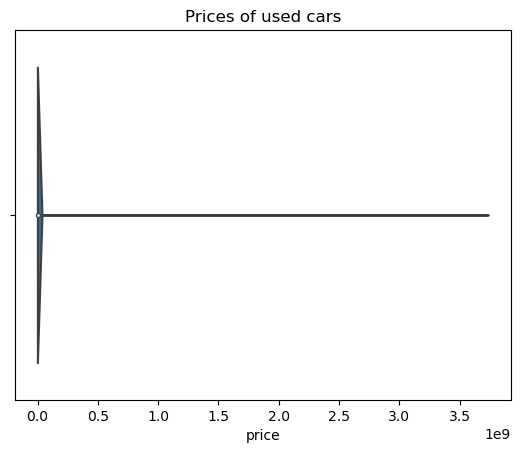

In [181]:
# Distribution of prices
sns.violinplot(x=data["price"])
plt.title('Prices of used cars')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Text(0.5, 1.0, 'Prices of used cars')

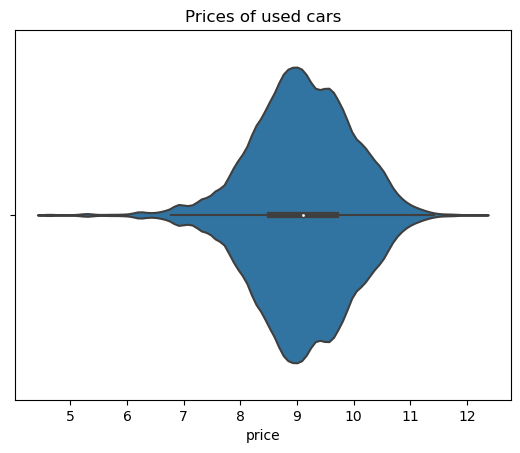

In [182]:
# Selection some of the columns and excluding the ones with too many values (model and manufacturer)
data_ready = data[['price','year','condition','cylinders','fuel','transmission','drive','size','type','paint_color','odometer']]

#deleting the rows with NaN values
data_ready = data_ready.dropna()

#converting the type of the year column
data_ready['year'] = data_ready['year'].astype(int)

#dataset contains a lot of mistake in the prices some are 0 or 1 while others go through 3736928711 which doesn't make any sense
#keeping only cars with a price between 99 and 200000
data_ready = data_ready.query('price <= 200000 & price >= 99')

# transforming the column cylinders
# Convert values to integers
data_ready['cylinders'] = data_ready['cylinders'].str.extract('(\d+)').astype(float).astype('Int64')
# Drop rows where the value is 'other' because it won't help the customer
data_ready = data_ready[data_ready['cylinders'] != 'other']
data_ready = data_ready[data_ready['fuel'] != 'other']
data_ready = data_ready[data_ready['transmission'] != 'other']
data_ready = data_ready[data_ready['type'] != 'other']

# transforming the column condition
# Define mapping dictionary
condition_mapping = {
    'new': 6,
    'like new': 5,
    'excellent': 4,
    'good': 3,
    'fair': 2,
    'salvage': 1
}

# Map condition categories to numerical values, convert the column to integer type
data_ready['condition'] = data_ready['condition'].map(condition_mapping).astype(int)

# transforming the column condition
# Define mapping dictionary
transmission_mapping = {
    'automatic': 1,
    'manual': 0
}

# Map condition categories to numerical values, convert the column to integer type
data_ready['transmission'] = data_ready['transmission'].map(transmission_mapping).astype(int)

#We apply logarithm on the price so it's more spreaded
data_ready['price'] = np.log1p(data_ready['price'])

# delete duplicates
data_ready = data_ready.drop_duplicates()

# distribution of prices
sns.violinplot(x=data_ready["price"])
plt.title('Prices of used cars')

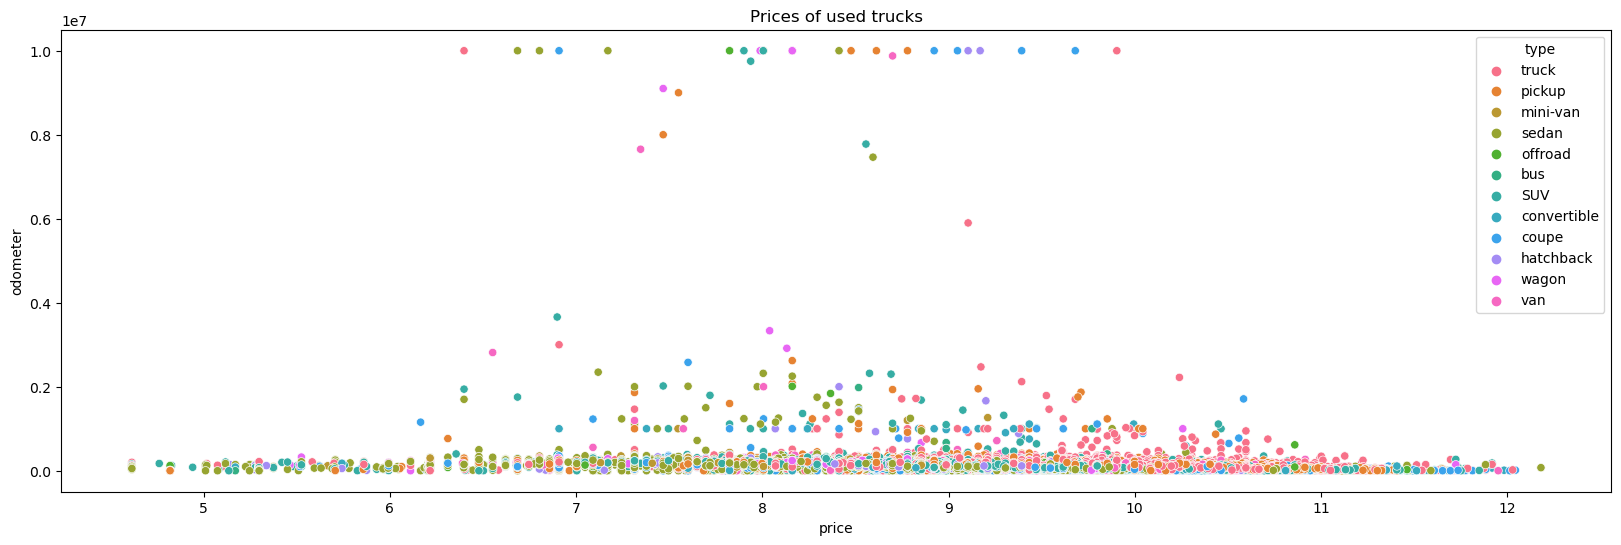

In [183]:
# Create the scatter plot
plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=data_ready, x="price", y="odometer", hue='type', sizes=(20, 200))

# Add title
plt.title('Prices of used trucks')

# Show plot
plt.show()

In [184]:
data_ready_non_encoded = data_ready
# Extract the categorical columns
cat_columns = data_ready[['fuel','drive','size','type','paint_color']]
print(cat_columns.shape)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the encoder on the categorical columns
cat_columns_encoded = encoder.fit_transform(cat_columns)
print(cat_columns_encoded.shape)

# Get feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(['fuel','drive','size','type','paint_color'])

data_ready_encoded_1 = data_ready.drop(['fuel','drive','size','type','paint_color'], axis=1)
print('data_ready_encoded_1 :',data_ready_encoded_1.shape)
# Convert the encoded array back to a DataFrame with appropriate column names
data_ready_encoded_2 = pd.DataFrame(cat_columns_encoded, columns=feature_names)
print('data_ready_encoded_2 :',data_ready_encoded_2.shape)

data_ready_encoded = pd.concat([data_ready_encoded_1.reset_index(drop=True), data_ready_encoded_2.reset_index(drop=True)], axis=1)
print('data_ready_encoded :',data_ready_encoded.shape)

(60347, 5)
(60347, 35)
data_ready_encoded_1 : (60347, 6)
data_ready_encoded_2 : (60347, 35)
data_ready_encoded : (60347, 41)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [185]:
X_train, X_test, y_train, y_test = train_test_split(data_ready_encoded.drop('price',axis=1), data_ready_encoded['price'], random_state = 42)

In [186]:
# Pipe with only a linear regression on all 40 features
pipe_0 = Pipeline([('linreg', LinearRegression())])
pipe_0.fit(X_train, y_train)
pipe_0

Pipeline(steps=[('linreg', LinearRegression())])

In [187]:
# Pipe with a 8-columns selector and a linear regression on all 40 features
pipe_1 = Pipeline([
    ('column_selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=8)),
    ('linreg', LinearRegression())
    ])
pipe_1.fit(X_train, y_train)
pipe_1

Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=8)),
                ('linreg', LinearRegression())])

In [188]:
# Pipe + GridSearch on the number of features to select + linear regression on all 40 features
pipe_2_param_dict =  {'selector__n_features_to_select': [4,8,12,16,20]}
pipe_2 = Pipeline([
    ('selector', SequentialFeatureSelector(LinearRegression())),
    ('linreg', LinearRegression())
    ])
pipe_2_grid = GridSearchCV(pipe_2, param_grid=pipe_2_param_dict)
pipe_2_grid.fit(X_train, y_train)
pipe_2

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('linreg', LinearRegression())])

In [189]:
# Pipe and GridSearch on a scaler + ridge 
pipe_3_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
pipe_3 = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
pipe_3_grid = GridSearchCV(pipe_3, param_grid=pipe_3_param_dict)
pipe_3_grid.fit(X_train, y_train)
pipe_3

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [190]:
# Pipe on a scaler + Lasso with grid search + 5-Fold cross validation
pipe_4_param_dict = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}
pipe_4 = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])
pipe_4_grid = GridSearchCV(pipe_4, param_grid=pipe_4_param_dict, cv=5)
pipe_4_grid.fit(X_train, y_train)
pipe_4

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso())])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [191]:
scores_df = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'Train MSE', 'Test MSE'])

In [192]:
# Evaluation of the model pipe_0
train_mse = round(float(mean_squared_error(y_train, pipe_0.predict(X_train))),2)
test_mse = round(float(mean_squared_error(y_test, pipe_0.predict(X_test))),2)
train_score = round(float(pipe_0.score(X_train, y_train)),2)
test_score = round(float(pipe_0.score(X_test, y_test)),2)

scores_df.loc[len(scores_df.index)] = ['pipe_0', train_score, test_score, train_mse, test_mse]

In [193]:
# Evaluation of the model pipe_1
train_mse = round(float(mean_squared_error(y_train, pipe_1.predict(X_train))),2)
test_mse = round(float(mean_squared_error(y_test, pipe_1.predict(X_test))),2)
train_score = round(float(pipe_1.score(X_train, y_train)),2)
test_score = round(float(pipe_1.score(X_test, y_test)),2)

scores_df.loc[len(scores_df.index)] = ['pipe_1', train_score, test_score, train_mse, test_mse]

In [194]:
# Evaluation of the model pipe_2
best_estimator = pipe_2_grid.best_estimator_
best_model = best_estimator.named_steps['linreg']

# Get the best feature selector from the pipeline
best_selector = best_estimator.named_steps['selector']
selected_features = best_selector.get_support()
selected_feature_names = X_train.columns[selected_features]

# Score on the training and test sets
train_score = round(float(best_model.score(X_train[selected_feature_names],y_train)),2)
test_score = round(float(best_model.score(X_test[selected_feature_names],y_test)),2)
mse_train = round(float(mean_squared_error(y_train, best_model.predict(X_train[selected_feature_names]))),2)
mse_test = round(float(mean_squared_error(y_test, best_model.predict(X_test[selected_feature_names]))),2)

scores_df.loc[len(scores_df.index)] = ['pipe_2', train_score, test_score, train_mse, test_mse]

In [195]:
# Evaluation of the model pipe_3
best_estimator = pipe_3_grid.best_estimator_
best_model = best_estimator.named_steps['ridge']

# Score on the training and test sets
train_score = round(float(best_model.score(X_train,y_train)),2)
test_score = round(float(best_model.score(X_test,y_test)),2)
mse_train = round(float(mean_squared_error(y_train, best_model.predict(X_train))),2)
mse_test = round(float(mean_squared_error(y_test, best_model.predict(X_test))),2)

scores_df.loc[len(scores_df.index)] = ['pipe_3', train_score, test_score, train_mse, test_mse]

In [196]:
# Evaluation of the model pipe_4
best_estimator = pipe_4_grid.best_estimator_
best_model = best_estimator.named_steps['lasso']

train_score = round(float(best_model.score(X_train,y_train)),2)
test_score = round(float(best_model.score(X_test,y_test)),2)
mse_train = round(float(mean_squared_error(y_train, best_model.predict(X_train))),2)
mse_test = round(float(mean_squared_error(y_test, best_model.predict(X_test))),2)

scores_df.loc[len(scores_df.index)] = ['pipe_4', train_score, test_score, train_mse, test_mse]
scores_df

,Model,Train Score,Test Score,Train MSE,Test MSE
0,pipe_0,4.100000e-01,3.900000e-01,0.46,0.48
1,pipe_1,3.900000e-01,3.700000e-01,0.48,0.49
2,pipe_2,4.100000e-01,3.900000e-01,0.48,0.49
3,pipe_3,-6.715298e+08,-9.707140e+08,0.48,0.49
4,pipe_4,-6.618351e+08,-9.567133e+08,0.48,0.49


The different models have the same MSE, which means no one is really more efficient than the others.

In [197]:
r = permutation_importance(pipe_0, X_test, y_test, n_repeats=30, random_state=0)

# Create a structured NumPy array to store the results
dtype = [('Feature', '<U30'), ('Mean', float), ('Std', float)]
result_array = np.empty(len(r.importances_mean), dtype=dtype)

# Fill the array with feature names, means, and stds
for i, idx in enumerate(r.importances_mean.argsort()[::-1]):
    if r.importances_mean[idx] - 2 * r.importances_std[idx] > 0:
        result_array[i] = (X_test.columns[idx], r.importances_mean[idx], r.importances_std[idx])

# Convert the structured NumPy array to a DataFrame
result_df = pd.DataFrame(result_array)

# Print the DataFrame
print(result_df)

               Feature      Mean       Std
0            condition  0.266070  0.004712
1                 year  0.078889  0.001923
2            drive_fwd  0.030383  0.001464
3           type_sedan  0.029539  0.001473
4             odometer  0.020091  0.001828
5            cylinders  0.019057  0.001120
6            drive_4wd  0.014157  0.000814
7           type_truck  0.011992  0.000835
8             fuel_gas  0.009430  0.000927
9          fuel_diesel  0.008150  0.000779
10            type_SUV  0.006390  0.000712
11          type_coupe  0.004956  0.000617
12    type_convertible  0.004933  0.000837
13      size_full-size  0.003689  0.000547
14          type_wagon  0.003233  0.000509
15       type_mini-van  0.003117  0.000397
16        transmission  0.002397  0.000382
17      type_hatchback  0.002224  0.000465
18   paint_color_black  0.002155  0.000563
19           drive_rwd  0.002029  0.000530
20   paint_color_green  0.001529  0.000378
21   paint_color_brown  0.001302  0.000390
22  paint_c

In [198]:
best_estimator = pipe_2_grid.best_estimator_
best_model = best_estimator.named_steps['linreg']
coefs = best_model.coef_

# Get the best feature selector from the pipeline
best_selector = best_estimator.named_steps['selector']
selected_features = best_selector.get_support()
selected_feature_names = X_train.columns[selected_features]

# Create a DataFrame to display the coefficients of the selected features
coefs_df_selected = pd.DataFrame(coefs.T, columns=['Coefficient'], index=selected_feature_names)
coefs_df_selected.sort_values(by='Coefficient', ascending=True, inplace=True)
coefs_df_selected['Coefficient'] = coefs_df_selected['Coefficient']*100
coefs_df_selected = coefs_df_selected.reset_index()

# Print the coefficients
coefs_df_selected

,index,Coefficient
0,type_wagon,-42.920368
1,type_sedan,-40.657328
2,type_mini-van,-38.681130
3,drive_fwd,-35.006815
4,type_hatchback,-34.454712
5,type_SUV,-28.743050
6,fuel_gas,-20.001719
7,paint_color_brown,-15.588461
8,paint_color_green,-15.464598
9,transmission,-9.858047


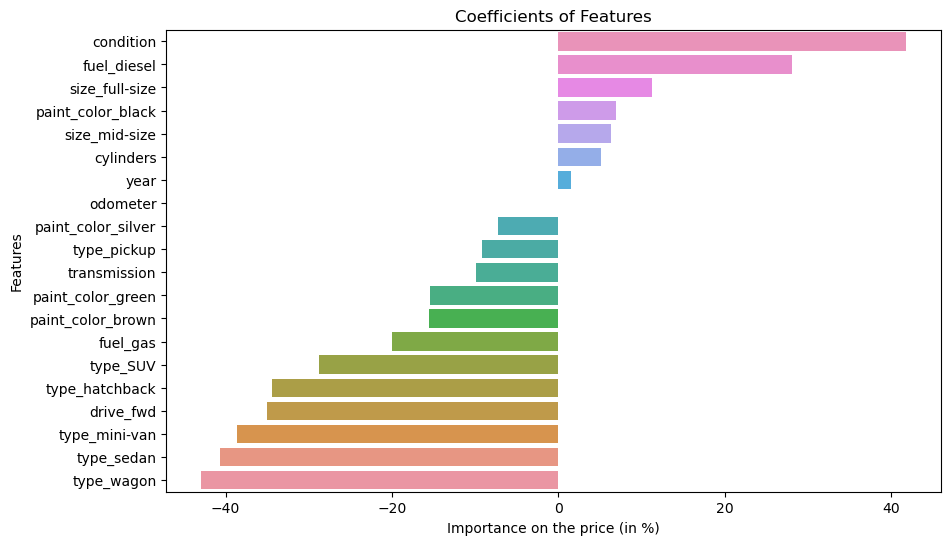

In [199]:
# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(coefs_df_selected, x="Coefficient", y='index')
plt.xlabel('Importance on the price (in %)')
plt.ylabel('Features')
plt.title('Coefficients of Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most influential feature on top
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

After using differents modelizations on the dataset, we get these key insights on pricing a used car :

From far the main characteristic is the condition of the car.
At the opposite of what we could have expected the mileage is not significatively impacting.

The price is increasing for :
- diesel cars, 
- full-size and mid_size cars, 
- black cars, 
- powerful cars (cylinders), 
- recent cars.

The price is decreasing for :
- wagon,sedan,mini-van, hatchback,SUV and less for pickup type cars,
- green or brown cars and less for silver,
- fwd drive cars,
- gas cars.

When pricing a used car, pay attention to the condition of the car, a difference between a car in fair condition and the same car in good condition would be a difference in the price of 42 points.

Prefer the full (11% more expensive) and mid-size cars(6% more expensive) rather than the compact and sub-compact cars.

When it comes to the color, the black ones will sell at a higher price (7% more expensive), while the brown and green will sell at a lower price than the exact same car on a different color (15% cheaper).

Diesel cars are 28% more expensive than the one which are not and gas cars are 20% less expensive.

About the power of the car, a car with 2 cylinders more than others would get 10% increase in its price.

To get a specific price for a car, it's possible to make others analysis focused on a specific type of car of instance and get all the weights for all others factors (coefficients).